In [59]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Grid World

In [60]:
class Grid():
    def __init__(self , rows , cols , start):
        self.rows = rows
        self.cols = cols
        self.i = start[0]
        self.j = start[1]

    def set(self, actions , rewards):
        self.actions = actions
        self.rewards = rewards

    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]

    def is_terminal(self, s):
        return s in self.rewards

    def current_state(self):
        return (self.i , self.j)

    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())

    def move(self , a):
        if a in self.actions[(self.i , self.j)]:
            if a == "U":
                self.i -= 1

            elif a == "D":
                self.i += 1

            elif a == "R":
                self.j += 1

            elif a == "L":
                self.j -= 1
        
        return self.rewards.get((self.i , self.j) , 0)

    def game_over(self):
        return (self.i , self.j) in self.rewards

In [69]:
def initialize_grid():
    rows , cols = 3 , 4
    start = (2 , 0)
    g = Grid(rows , cols , start)
    
    # reward for termination state
    rewards = {(0, 3): 1 , (1 , 3) : -1}
    
    # possible actions can be performed for each state
    actions = {
              (0, 0):["D" , "R"],
              (0, 1):["R"],
              (0, 2):["R"],
              (1, 0):["U" ,"D"],
              (1, 2):["U" ,"D" ,"R"],
              (2, 0):["U" , "R"],
              (2, 1):["R" , "L"],
              (2, 2):["R" , "L" ,"U"],
              (2, 3):["L" , "U"]
    }

    g.set(actions , rewards)

    return g

## Visualization Functions

In [70]:
def print_values(V, g):
    print("Printing Values")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="") # -ve sign takes up an extra space
        print("")


def print_policy(P, g):
    print("Printing Policy")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i,j), ' ')
            print("  %s  |" % a, end="") 
        print("")

## Defining Play Game function

In [116]:
def play_game(grid , Policy):
    # reset game to start at a random position
    # we need to do this if we have a deterministic policy
    # we would never end up at certain states, but we still want to measure their value
    # this is called the "exploring starts" method

    action_states = list(grid.actions.keys())
    start_state_index = np.random.choice(len(action_states))
    # print(action_states)
    grid.set_state(action_states[start_state_index])

    s = grid.current_state()
    a = np.random.choice(ACTION_SPACE)
    
    states = [s]
    actions = [a]
    rewards = [0]

    for _ in range(len(grid.all_states())): #sometimes states can form a loop , so we have to limit the number of steps
        old_s  = s
        r = grid.move(a)
        s = grid.current_state()

        states.append(s)
        rewards.append(r)
        
        if grid.game_over():
            break
        
        # if the next state is wall , then move is going to return the same state
        elif old_s == s:
            rewards[-1] = -100
            break

        else:
            a = Policy[s]
            actions.append(a)
        # print(s , a)
    
    # we want to return:
    # states  = [s(0), s(1), ..., s(T-1), s(T)]
    # actions = [a(0), a(1), ..., a(T-1),     ]
    # rewards = [   0, R(1), ..., R(T-1), R(T)]
    # return (states , actions , rewards)
    return states , actions , rewards

In [117]:
# function for finding maximum value and its corresponding key in dictionary
def max_dict(d):
    # find max val
    max_val = max(d.values())

    # find keys corresponding to max val
    for key , val in d.items():
        if val == max_val:
            max_key = key
            break

    return max_key , max_val

## Initialize grid

In [118]:
grid = initialize_grid()
ACTION_SPACE = ("U" , "D" , "R" , "L")
gamma = 0.9

## Initialize Policy

In [130]:
Policy = {}
for s in grid.actions.keys():
    Policy[s] = np.random.choice(ACTION_SPACE)

## Initialize Q values

In [131]:
# initialize Q(s,a) and returns
Q = {}
sample_counts = {}
states = grid.all_states()
for s in states:
    if s not in grid.rewards: # not a terminal state
        Q[s] = {}
        sample_counts[s] = {}
        for a in ACTION_SPACE:
            Q[s][a] = 0
            sample_counts[s][a] = 0
    else:
        # terminal state or state we can't otherwise get to
        pass


## Monte Carlo Policy Improvement and Evaluation

iteration 0
Printing Policy
---------------------------
  D  |  U  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  D  |  U  |  R  |  D  |
iteration 1000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  R  |  R  |  R  |  L  |
iteration 2000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  R  |  L  |
iteration 3000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  R  |  L  |
iteration 4000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  R  |  L  |
iteration 5000
Printing Policy
----------------------

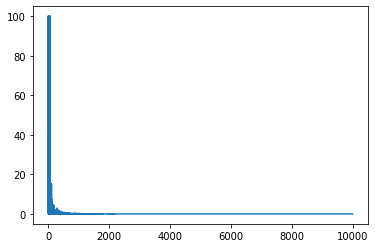

final policy:
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |
final values:
Printing Values
---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.81| 0.00|
---------------------------
 0.51| 0.16| 0.62| 0.09|


In [135]:
# repeat until convergence
deltas = []
for it in range(10000):
    if it % 1000 == 0:
        print("iteration" , it)
        print_policy(Policy , grid)

    # generate an episode using pi
    biggest_change = 0
    states , actions , rewards = play_game(grid, Policy)
    # states ,actions , rewards = state_action_rewards[... , 0] , state_action_rewards[... , 1] , state_action_rewards[... , 2]

    # create a list of only state-action pairs for lookup
    states_actions = list(zip(states, actions))

    T = len(states)
    G = 0
    for t in range(T - 2, -1, -1):
        # retrieve current s, a, r tuple
        s = states[t]
        a = actions[t]

        # update G
        G = rewards[t+1] + gamma * G

        # check if we have already seen (s, a) ("first-visit")
        if (s, a) not in states_actions[:t]:
            old_q = Q[s][a]
            sample_counts[s][a] += 1
            N = sample_counts[s][a]
            Q[s][a] = ((N - 1)*old_q + (G) ) / N # running mean

            # update policy
            Policy[s] = max_dict(Q[s])[0]

            # update delta
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
    deltas.append(biggest_change)
    # if biggest_change < 1e-3:
    #     break

plt.plot(deltas)
plt.show()

print("final policy:")
print_policy(Policy, grid)

# find V
V = {}
for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]

print("final values:")
print_values(V, grid)